In [6]:
import os
if not os.path.exists("dataset"):
    os.mkdir("dataset")

In [12]:
import cv2
from tqdm.auto import tqdm
from segment_anything.utils.transforms import ResizeLongestSide

transform = ResizeLongestSide(1024)

path = "raw/MoCA-Mask/MoCA_Video/"
for data_type in os.listdir(path):
    if not os.path.exists("dataset/"+data_type):
        os.mkdir("dataset/"+data_type)

    for vid in tqdm(os.listdir(path+data_type)):
        if not os.path.exists("dataset/"+data_type+"/"+vid):
            os.mkdir("dataset/"+data_type+"/"+vid)
        
        for data_mode in os.listdir(path+data_type+"/"+vid):
            if not os.path.exists("dataset/"+data_type+"/"+vid+"/"+data_mode):
                os.mkdir("dataset/"+data_type+"/"+vid+"/"+data_mode)

            for img in os.listdir(path+data_type+"/"+vid+"/"+data_mode):
                image = cv2.imread(path+data_type+"/"+vid+"/"+data_mode+"/"+img)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = transform.apply_image(image)
                cv2.imwrite("dataset/"+data_type+"/"+vid+"/"+data_mode+"/"+img, image)



  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [14]:
import os 
path = "dataset/TrainDataset_per_sq"

obj_path = {}
obj_arr = []
input_seq = 4
total_imgs = 0
obj_len = {}

for vid in os.listdir(path):
    obj_path[vid] = {'Imgs':[], 'GT':[]}
    obj_arr.append(vid)
    obj_len[vid] = 0
    temp_path = os.path.join(path, vid)

    img_list = sorted(os.listdir(os.path.join(temp_path, "GT")))
    obj_len[vid] = len(img_list) - input_seq  
    total_imgs += obj_len[vid]

    for type_ in ['Imgs', 'GT']:
        img_list = sorted(os.listdir(os.path.join(temp_path, type_)))
        for frame in img_list:
            obj_path[vid][type_].append(os.path.join(temp_path, type_, frame))

def get_object_from_id(id):
    n = len(obj_arr)
    if (id ==0): return obj_arr[n-1], 0
    while id>0:
        n -= 1
        assert n>=0 ,"Error"
        id -= obj_len[obj_arr[n]]
    
    return obj_arr[n], obj_len[obj_arr[n]]+id

print(total_imgs, obj_len)

print(get_object_from_id(0), get_object_from_id(total_imgs))

3662 {'peacock_flounder_1': 78, 'jerboa': 12, 'shrimp': 7, 'flounder_5': 45, 'spider_tailed_horned_viper_2': 31, 'markhor': 17, 'snow_leopard_4.1': 174, 'flounder_8': 53, 'flatfish_1': 44, 'snow_leopard_5.1': 60, 'leaf_tail_gecko': 31, 'smallfish': 59, 'plaice': 156, 'pygmy_seahorse_4': 16, 'turtle': 189, 'cuttlefish_4': 21, 'mountain_goat': 16, 'hermit_crab': 16, 'crab_1': 30, 'hedgehog_1': 7, 'scorpionfish_5': 12, 'pygmy_seahorse_3': 35, 'orchid_mantis': 40, 'stick_insect_0': 45, 'peacock_flounder_0': 50, 'wolf': 16, 'flatfish_0': 156, 'spider_tailed_horned_viper_3': 16, 'pallas_cat': 21, 'flounder': 40, 'flatfish_4': 55, 'sole': 141, 'snow_leopard_4.2': 84, 'nile_monitor_0': 134, 'hedgehog_2': 7, 'octopus': 127, 'flounder_3': 1, 'pygmy_seahorse_1': 40, 'snow_leopard_5.2': 6, 'crab_2': 40, 'egyptian_nightjar': 55, 'scorpionfish_4': 21, 'lichen_katydid': 256, 'scorpionfish_2': 45, 'flatfish_3': 21, 'elephant': 12, 'snow_leopard_8': 26, 'cuttlefish_1': 12, 'hedgehog_0': 26, 'eastern_sc

['dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00000.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00005.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00010.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00015.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00020.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00025.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00030.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00035.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00040.jpg', 'dataset/TrainDataset_per_sq/peacock_flounder_1/Imgs/00045.jpg'] 82


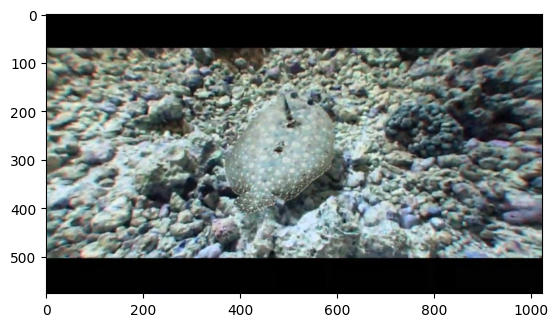

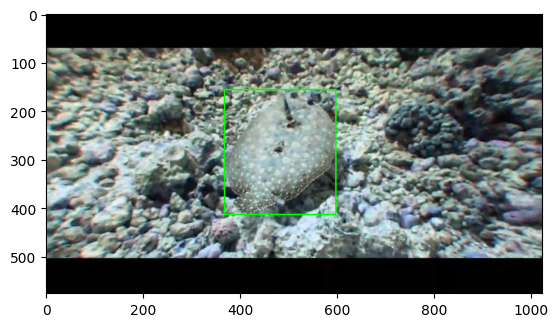

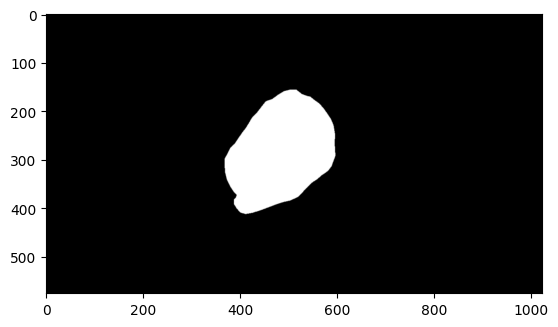

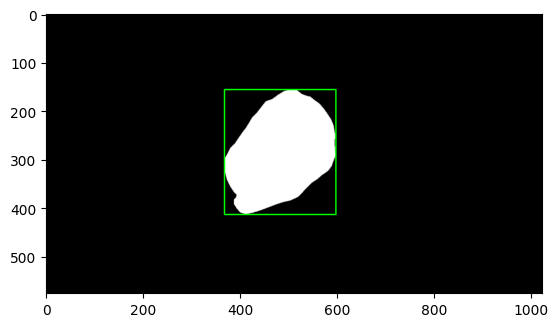

In [17]:
import cv2
id = total_imgs 
obj, nth_frame = get_object_from_id(id)
img_seq = []
mask_seq = []
bbox_seq = []

def get_bbox(mask):
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    return [x,y, x+w, y+h]


for next_frame in range(nth_frame, nth_frame+input_seq):
    img = cv2.imread(obj_path[obj]['Imgs'][next_frame])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(obj_path[obj]['GT'][next_frame])
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    img_seq.append(img)
    mask_seq.append(mask)
    bbox_seq.append(get_bbox(mask))

print(obj_path['peacock_flounder_1']['Imgs'][:10], len(obj_path['peacock_flounder_1']['Imgs']))

import matplotlib.pyplot as plt
plt.imshow(img_seq[0])
plt.show()
img = cv2.rectangle(img_seq[0], (bbox_seq[0][0], bbox_seq[0][1]), (bbox_seq[0][2], bbox_seq[0][3]), (0,255,0), 2)
plt.imshow(img)
plt.show()
plt.imshow(mask_seq[0])
plt.show()
img = cv2.rectangle(mask_seq[0], (bbox_seq[0][0], bbox_seq[0][1]), (bbox_seq[0][2], bbox_seq[0][3]), (0,255,0), 2)
plt.imshow(img)
plt.show()